<a href="https://colab.research.google.com/github/marabaso/ie423/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/blackfriday/train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


We can see from the first 5 row of the data there are missing values for some variables.

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

We have missing values in *Product_Category_2* and *Product_Category_3*.

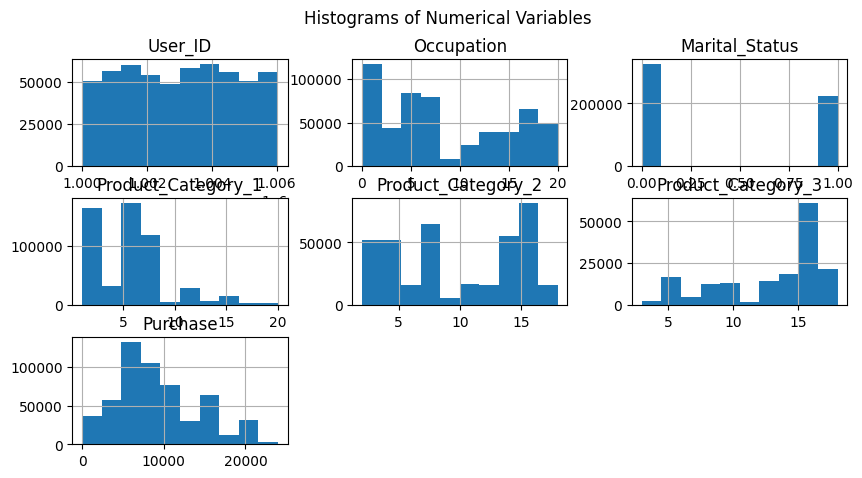

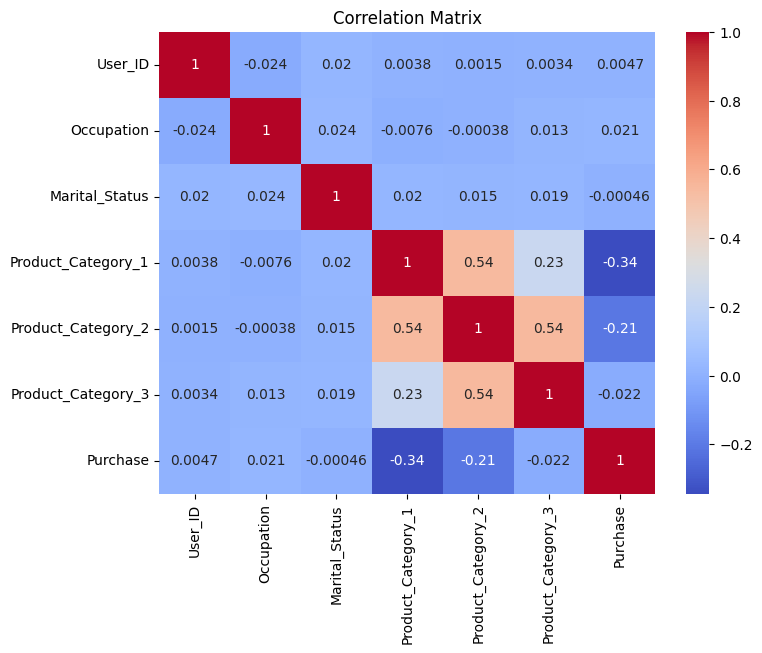

Skewness:
 User_ID               0.003066
Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Product_Category_2   -0.162758
Product_Category_3   -0.765446
Purchase              0.600140
dtype: float64
Kurtosis:
 User_ID              -1.195501
Occupation           -1.216114
Marital_Status       -1.864997
Product_Category_1    1.234757
Product_Category_2   -1.432267
Product_Category_3   -0.808066
Purchase             -0.338378
dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=10, figsize=(10, 5))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Skewness and Kurtosis
print("Skewness:\n", df.select_dtypes(include=['number']).skew())
print("Kurtosis:\n", df.select_dtypes(include=['number']).kurt())

**SOME COMMENT**

Before inspecting categorical variables, we change variable type of *User_ID* from numeric to categorical as the numbers implies neither cardinality nor ordinality.

In [8]:
df['User_ID'] = df['User_ID'].astype('object')

In [9]:
df.describe(include = ['object'])

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,3,5
top,1001680,P00265242,M,26-35,B,1
freq,1026,1880,414259,219587,231173,193821


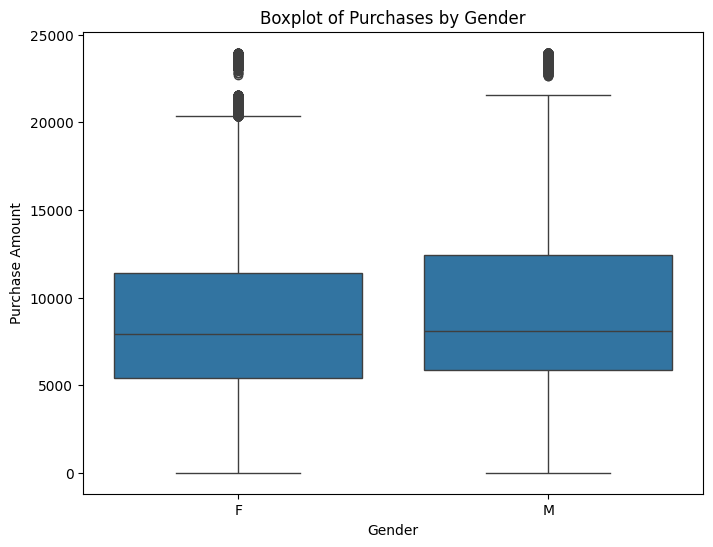

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Boxplot of Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()


SOME COMMENT

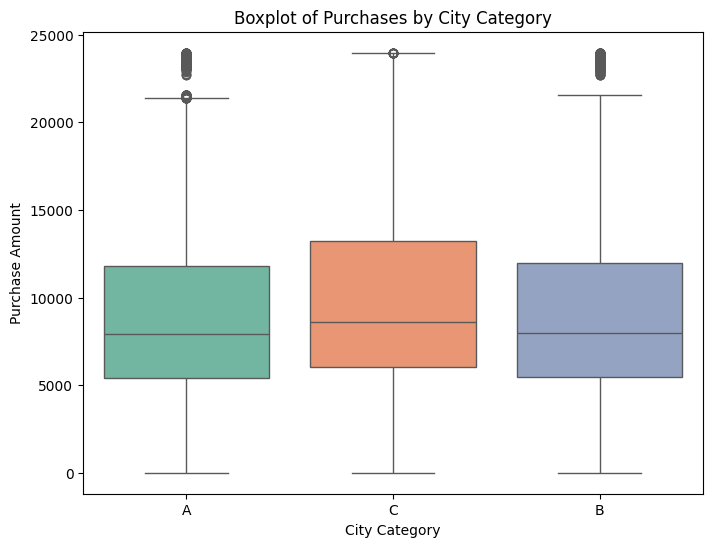

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='City_Category', y='Purchase', data=df, palette='Set2')
plt.title('Boxplot of Purchases by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()

SOME COMMENT

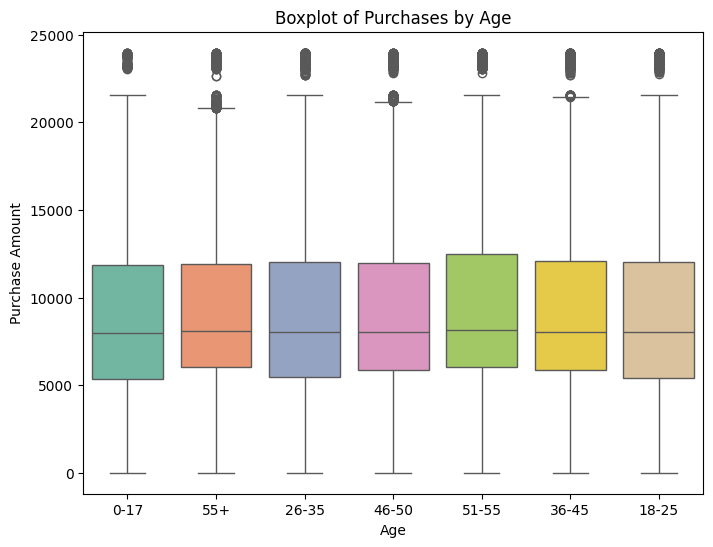

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='Purchase', data=df, palette='Set2')
plt.title('Boxplot of Purchases by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

SOME COMMENT

## Filling missing values

Since missing values come from variables with discrete values, we can use it by forward fillig

In [13]:
df['Product_Category_2'].interpolate(method='linear', inplace=True) #filling method
df['Product_Category_2'].fillna(method='bfill', inplace=True) #if first row is also missing filling that.
df['Product_Category_2'] = df['Product_Category_2'].round().astype(int) #rounding non-integer values

df['Product_Category_3'].interpolate(method='linear', inplace=True)
df['Product_Category_3'].fillna(method='bfill', inplace=True)
df['Product_Category_3'] = df['Product_Category_3'].round().astype(int)

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,6,14,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,10,15,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,15,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8,16,7969


In [15]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

No missing value left.

Before we split the data we encode categorical variables as we need numeric variables later while using Random Forest Regressor.

In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting the data

In [27]:
# Select target as a series and features as dataframe
y = df.loc[:,['Purchase']].values.ravel()
X = df.drop(['Purchase'],axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

In [28]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,6,14,8370
1,0,2376,0,0,10,0,2,0,1,6,14,15200
2,0,852,0,0,10,0,2,0,12,10,15,1422
3,0,828,0,0,10,0,2,0,12,14,15,1057
4,1,2734,1,6,16,2,4,0,8,8,16,7969


# Modelling

In [33]:
from sklearn.ensemble import RandomForestRegressor

Let's try to build a model with all the features...

In [30]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred,y_test)

[ 5621.4   2636.13  7443.24 ...  5707.65  8904.13 14503.61] [ 8013  2769  5952 ...  5222  3945 11935]


In [32]:
mae = mean_absolute_error(y_pred, y_test)
print(mae)

2020.2535557292708


## (Alternative way) Dropping columns with missing data

In [34]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/blackfriday/train.csv')

In [35]:
df2.dropna(axis=1, how='any', inplace=True)
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [36]:
categorical_cols = df2.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le

In [40]:
# Select target as a series and features as dataframe
y2 = df2.loc[:,['Purchase']].values.ravel()
X2 = df2.drop(['Purchase'],axis=1)

# Split into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,train_size=0.8, test_size=0.2,random_state=1)

In [41]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train2,y_train2)
y_pred2 = model.predict(X_test2)
print(y_pred2,y_test2)

[ 4950.01  2651.17  7565.29 ...  5415.46  8777.32 16405.96] [ 8013  2769  5952 ...  5222  3945 11935]


In [42]:
mae = mean_absolute_error(y_pred2, y_test2)
print(mae)

2020.009875561292


MAE's are almost identical, it means we can drop the columns. Otherwise we would have slightly longer run time.

## Build Gradient Boosted Tree Model

So far, we have made predictions with the Random Forest model, which achieves better performance than a single decision tree simply by averaging the predictions of many decision trees.  We refer to the random forest method as an **ensemble method**. By definition, ensemble methods combine the predictions of several models (e.g., several trees, in the case of random forests).

While the Random Forest model is - as the name suggests - "Random", what if consequent decision trees are added to the ensemble in such a way that the loss function (Mean Squared Error) is minimized?  This is what a gradient descent function helps with in the **Gradient Boosting** model.

Note that after the initial iteration decision tree F0, all subsequent iterations predict the error (instead of the target) using smaller decision trees F1, F2, etc. This results in the final prediction being F0 + learning_rate x F1 + learning_rate x F2 etc (where F1, F2 can be positive or negative values)...

Let's begin by training a simple Gradient Boosting model...

In [43]:
from xgboost import XGBRegressor

#Build and score default Gradient Boosting Model
modelxgb = XGBRegressor()
modelxgb.fit(X_train2, y_train2)
y_test_pred_xgb = modelxgb.predict(X_test2)
mae = mean_absolute_error(y_test_pred_xgb, y_test2)

print("MAE from default XGBoost model:")
print(mae)

MAE from default XGBoost model:
2004.2552242293334


Hold on. The result here is worse than what obtained from our previous Random Forest model.  Let's try to improve this by **tuning the parameters** that drive the Gradient Boosting model.  Below are some popular parameters...

`n_estimators`: maximum number of decision trees that will be ensembled

`max_depth`: maximum depth of each tree (typically 3-10)

`learning_rate`: weight applied to each tree (typically 0.01-0.2)

In [48]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

def hypertune_xgb_random(X_train, y_train, X_test, y_test):
    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3]}
    modelxgb = XGBRegressor()

    random_search = RandomizedSearchCV(estimator=modelxgb, param_distributions=param_dist,
                                       n_iter=10, scoring='neg_mean_absolute_error',
                                       cv=3, n_jobs=-1, verbose=2, random_state=42)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_test_pred_xgb = best_model.predict(X_test)
    mae = mean_absolute_error(y_test_pred_xgb, y_test)
    print("Best parameters found: ", random_search.best_params_)
    print("MAE from tuned XGBoost model: ", mae)
    return best_model, random_search.best_params_, mae

# Example usage
best_model, best_params, best_mae = hypertune_xgb_random(X_train2, y_train2, X_test2, y_test2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
MAE from tuned XGBoost model:  2004.9639233426979


The best hyperparameters found for the XGBoost model are:

* Subsample: 0.8
* Number of Estimators: 300
* Maximum Depth: 6
* Learning Rate: 0.1
* Gamma: 0.3
* Column Subsample by Tree: 1.0 \

The Mean Absolute Error (MAE) from the tuned XGBoost model is: 2004.96